In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/aksha/OneDrive/Desktop/Data Analytics/covid.csv'
covid_data = pd.read_csv(file_path)

In [3]:
# Drop columns with excessive missing values and rows with critical missing data
columns_to_drop = ['NewCases', 'NewDeaths', 'NewRecovered']
cleaned_data = covid_data.drop(columns=columns_to_drop).dropna(subset=['Continent', 'Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered'])

In [4]:
# Summarize data by continent for global overview
continent_summary = cleaned_data.groupby('Continent').agg({
    'TotalCases': 'sum',
    'TotalDeaths': 'sum',
    'TotalRecovered': 'sum',
    'ActiveCases': 'sum',
    'Population': 'sum'
}).reset_index()

In [5]:
# Add a column for active cases for visual clarity
continent_summary['ActiveCases'] = continent_summary['TotalCases'] - (
    continent_summary['TotalDeaths'] + continent_summary['TotalRecovered']
)

In [6]:
# Prepare the data for visualization
continent_summary_melted = continent_summary.melt(
    id_vars='Continent',
    value_vars=['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases'],
    var_name='Metric',
    value_name='Count'
)

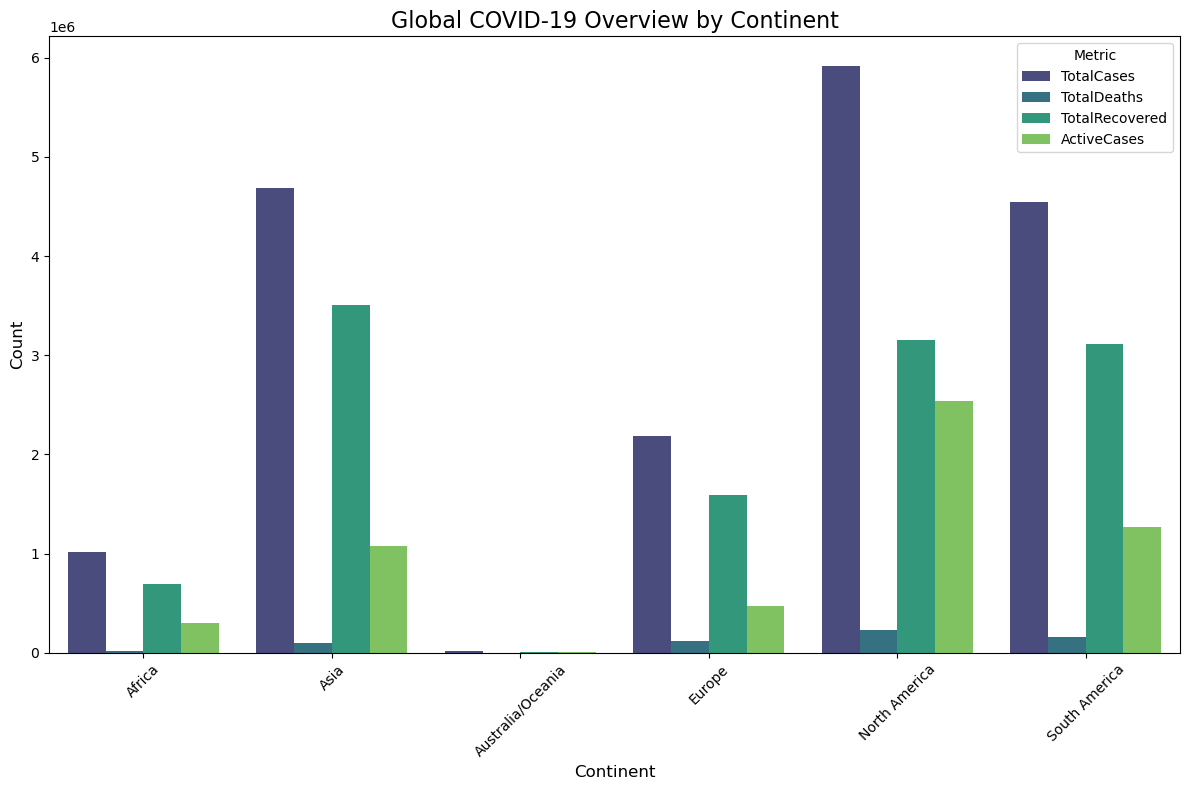

In [7]:
# Plot global overview
plt.figure(figsize=(12, 8))
sns.barplot(
    data=continent_summary_melted,
    x='Continent',
    y='Count',
    hue='Metric',
    palette='viridis'
)
plt.title('Global COVID-19 Overview by Continent', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

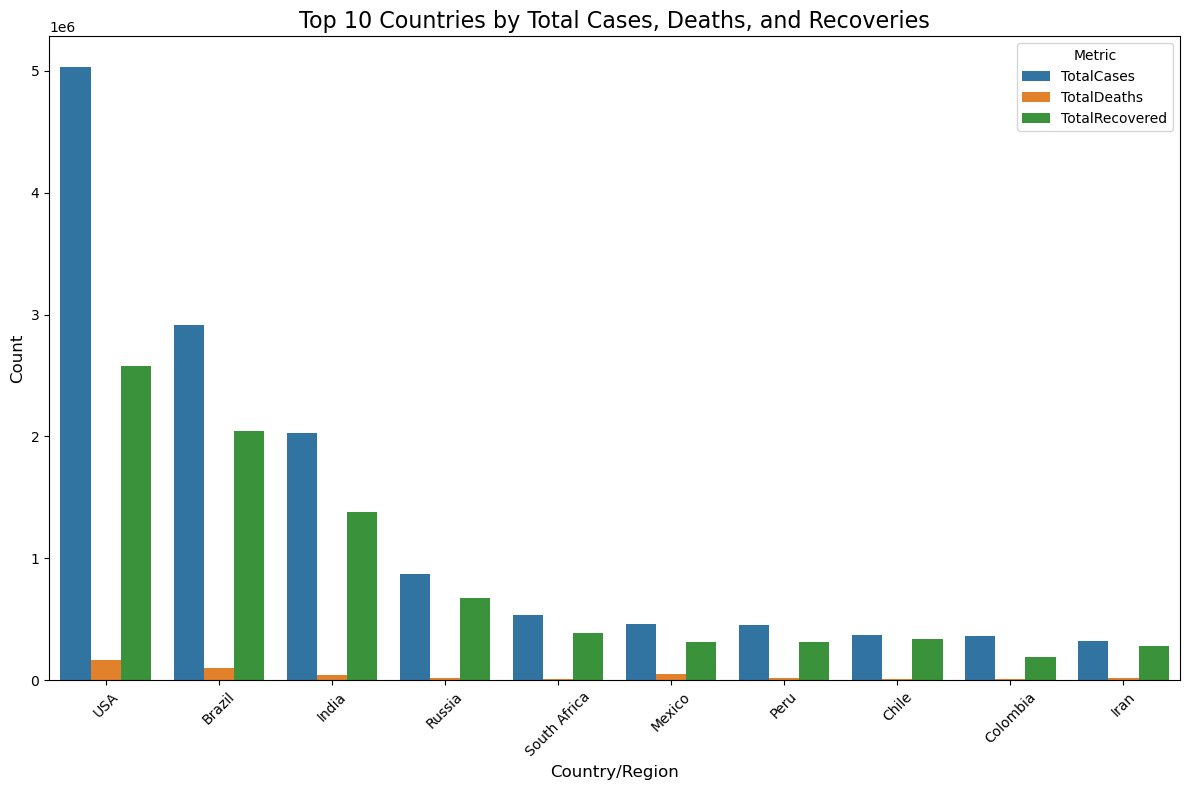

In [8]:
# Top 10 countries by Total Cases, Deaths, and Recoveries
top_countries = cleaned_data.nlargest(10, 'TotalCases')
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_countries.melt(id_vars='Country/Region', value_vars=['TotalCases', 'TotalDeaths', 'TotalRecovered'],
                            var_name='Metric', value_name='Count'),
    x='Country/Region', y='Count', hue='Metric', palette='tab10')
plt.title('Top 10 Countries by Total Cases, Deaths, and Recoveries', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

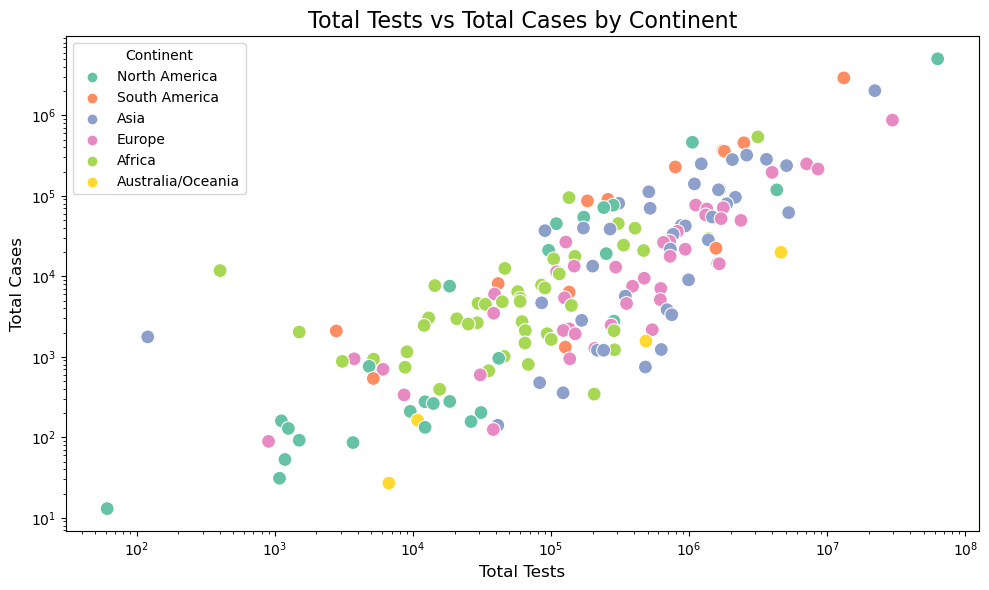

In [9]:
# Tests vs Cases Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='TotalTests', y='TotalCases', hue='Continent', palette='Set2', s=100)
plt.title('Total Tests vs Total Cases by Continent', fontsize=16)
plt.xlabel('Total Tests', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Continent', fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Assuming cleaned_data is already loaded
numeric_columns = ['Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop']

# Convert to numeric, coercing errors to NaN
for column in numeric_columns:
    cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors='coerce')

# Drop rows with NaN in numeric or grouping columns
cleaned_data = cleaned_data.dropna(subset=numeric_columns + ['Continent'])

# Group and calculate mean
per_million = cleaned_data.groupby('Continent')[numeric_columns].mean().reset_index()

# Verify result
print(per_million)

           Continent  Tot Cases/1M pop  Deaths/1M pop   Tests/1M pop
0             Africa       1370.818182      20.792727   18319.136364
1               Asia       4780.925000      45.945000   83338.875000
2  Australia/Oceania        285.250000       3.825000   71858.500000
3             Europe       3898.439024     181.707317  150331.439024
4      North America       3177.555556     114.000000   67191.962963
5      South America       8055.000000     216.769231   44088.692308


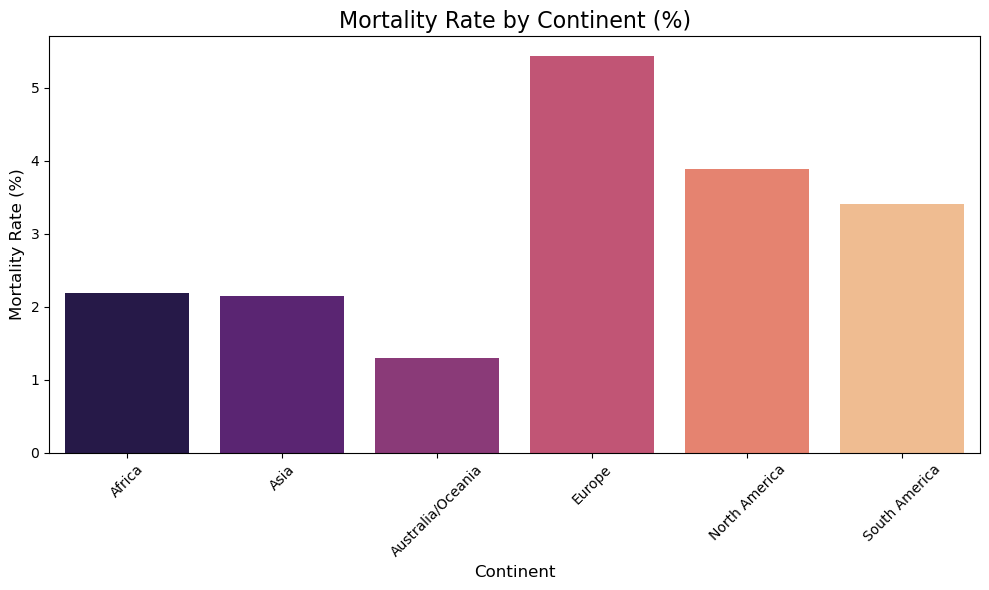

In [13]:
# Mortality Rate by Continent
continent_summary['MortalityRate'] = (continent_summary['TotalDeaths'] / continent_summary['TotalCases']) * 100
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_summary, x='Continent', y='MortalityRate', palette='magma')
plt.title('Mortality Rate by Continent (%)', fontsize=16)
plt.ylabel('Mortality Rate (%)', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

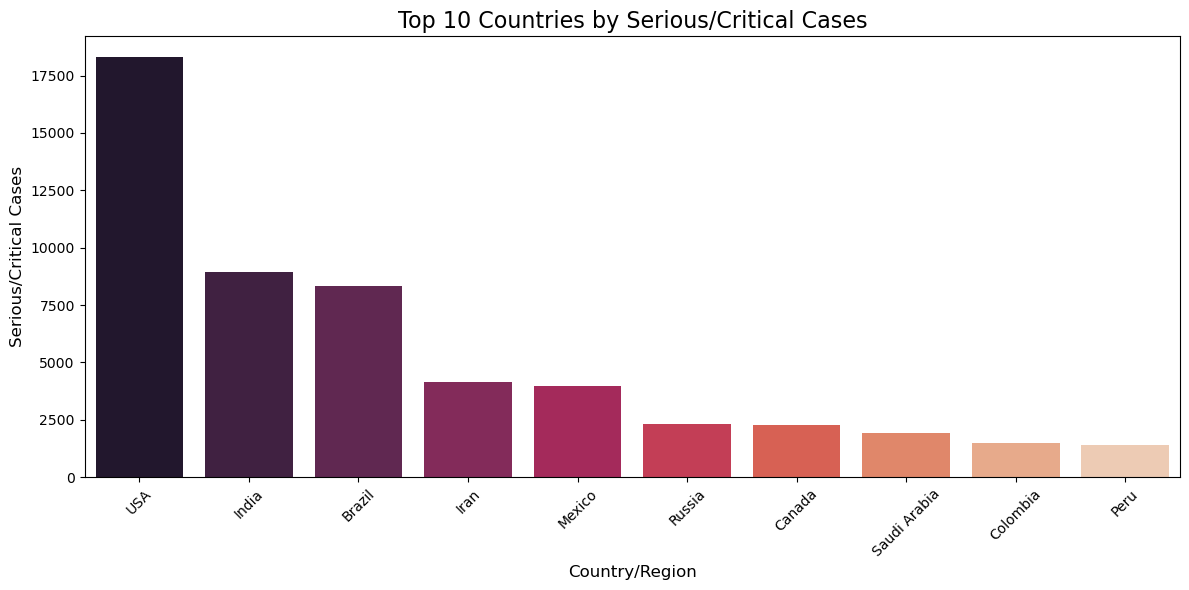

In [14]:
# Critical Cases Analysis
critical_cases = cleaned_data.nlargest(10, 'Serious,Critical')[['Country/Region', 'Serious,Critical']]
plt.figure(figsize=(12, 6))
sns.barplot(data=critical_cases, x='Country/Region', y='Serious,Critical', palette='rocket')
plt.title('Top 10 Countries by Serious/Critical Cases', fontsize=16)
plt.ylabel('Serious/Critical Cases', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()